In [1]:
import pathlib

import yaml

import numpy as np

import itertools

In [2]:
import symlens

In [3]:
from pixell import enmap, utils as putils

In [4]:
import utilities as u

In [5]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = [12, 8]

csfont = {'fontname':'cmss10'}
font = font_manager.FontProperties(family='Latin Modern Roman',
                                   style='normal', size = 8)


In [6]:
import best
import re

In [7]:
paperplots = pathlib.Path('paperplots')

### Some general settings

In [8]:
values_file = 'configurations/configILC_plotting_validation_check.yaml' 
with open(values_file, 'r') as stream:
            data = yaml.safe_load(stream)

In [9]:


plots_directory = data['plotsdirectory']

analysis_directory = data['analysisdirectory']

savingdirectory = data['savingdirectory']

Nsims = data['Nsims']

results_directory = data['resultsdirectory']
spectra_path = data['spectra_path']
sims_directory = data['sims_directory']
WR = u.write_read(sims_directory)

PP = pathlib.Path(analysis_directory)
Pplots = pathlib.Path(plots_directory)

fgnamefiles = data['fgnamefiles']

estimators_dictionary = data['estimators']
estimators = list(estimators_dictionary.keys())


lista_lmaxes = []

names = {}

for e in estimators:
    elemento = estimators_dictionary[e]
    names[e] = elemento['direc_name']
    lmax_min, lmax_max = elemento['lmax_min'], elemento['lmax_max']
    num = elemento['number']
    lista_lmaxes += [np.linspace(lmax_min, lmax_max, num, dtype = int)]

lmaxes_configs = list(itertools.product(*lista_lmaxes))


#CHOOSE nu
nu = estimators_dictionary[estimators[0]]['nu']

In [10]:
C = u.Converting()

In [11]:
noisetag = data['noisekey']
trispectrumtag = data['trispectrumkey']
primarytag = data['primarykey']
secondarytag = data['secondarykey']
primarycrosstag = data['primarycrosskey']

lmin_sel, lmax_sel = data['lmin_sel'], data['lmax_sel']

optversion = data['optversion']

In [12]:
colors_ests = {}
labels_ests = {}
for e in estimators:
    colors_ests[e] = estimators_dictionary[e]['color']
    labels_ests[e] = estimators_dictionary[e]['label']

In [13]:
colors_ests['kk'] = 'black'
colors_ests['kg'] = 'yellow'

labels_ests['kk'] = 'Signal'
labels_ests['kg'] = 'Cross signal'

In [14]:
PP

PosixPath('output_ILC_validation')

## Plot noises for lmax = 3500 vs signal

In [15]:
lmax_fixed = 3500

In [16]:
fsky = 1.

In [17]:
changemap = lambda x: enmap.enmap(x, wcs)
mapsObjA = u.mapNamesObj(nu)
LoadA = u.LoadfftedMaps(mapsObj = mapsObjA, WR = WR, ConvertingObj = C, changemap = changemap, getfft = u.fft, lmax = lmax_fixed)

In [18]:
shape = LoadA.read_shape()
lonCenter, latCenter = 0, 0
shape, wcs = enmap.geometry(shape = shape, res = 1.*putils.arcmin, pos = (lonCenter, latCenter))
modlmap = enmap.modlmap(shape, wcs)
field_names_A = ['ilc', 'ilcdepr']

In [19]:
lmin_A, lmax_A = 30, 3500
lmin_B, lmax_B = 30, 3500
Lmin, Lmax = 20, 6000

In [20]:
Binner = u.Binner(shape, wcs, lmin = 10, lmax = 6000, deltal = 30, log = False, nBins = 20)

In [21]:
estimators_dictionary = data['estimators']
estimators = list(estimators_dictionary.keys())
estimatorcombs = list(itertools.combinations_with_replacement(list(estimators), 2))
estimators

['hu_ok', 'shear', 'bh', 'pbh', 'symm', 'symm-shear', 'symmbh', 'symmpbh']

In [22]:
logmode = data['logmode']
nlogBins = data['nlogBins']
deltal = data['deltalplot']

In [23]:
lmaxes_dict = {}
lmax_directory = ''
for e_index, e in enumerate(estimators):
    l = 3500
    lmaxes_dict[e] = l
    lmax_directory += f'{names[e]}{l}'

In [24]:
lmaxes_dict

{'hu_ok': 3500,
 'shear': 3500,
 'bh': 3500,
 'pbh': 3500,
 'symm': 3500,
 'symm-shear': 3500,
 'symmbh': 3500,
 'symmpbh': 3500}

In [25]:
logmode = True
nlogBins = 25

In [26]:
#estimators = ['hu_ok', 'symm']

In [27]:
estimatorcombs = list(itertools.combinations_with_replacement(list(estimators), 2))
estimatorcombs

[('hu_ok', 'hu_ok'),
 ('hu_ok', 'shear'),
 ('hu_ok', 'bh'),
 ('hu_ok', 'pbh'),
 ('hu_ok', 'symm'),
 ('hu_ok', 'symm-shear'),
 ('hu_ok', 'symmbh'),
 ('hu_ok', 'symmpbh'),
 ('shear', 'shear'),
 ('shear', 'bh'),
 ('shear', 'pbh'),
 ('shear', 'symm'),
 ('shear', 'symm-shear'),
 ('shear', 'symmbh'),
 ('shear', 'symmpbh'),
 ('bh', 'bh'),
 ('bh', 'pbh'),
 ('bh', 'symm'),
 ('bh', 'symm-shear'),
 ('bh', 'symmbh'),
 ('bh', 'symmpbh'),
 ('pbh', 'pbh'),
 ('pbh', 'symm'),
 ('pbh', 'symm-shear'),
 ('pbh', 'symmbh'),
 ('pbh', 'symmpbh'),
 ('symm', 'symm'),
 ('symm', 'symm-shear'),
 ('symm', 'symmbh'),
 ('symm', 'symmpbh'),
 ('symm-shear', 'symm-shear'),
 ('symm-shear', 'symmbh'),
 ('symm-shear', 'symmpbh'),
 ('symmbh', 'symmbh'),
 ('symmbh', 'symmpbh'),
 ('symmpbh', 'symmpbh')]

In [117]:
noise_dict = {}

In [180]:
estims = ['bh', 'hdv2']

In [181]:
estimatorcombs = list(itertools.combinations_with_replacement(list(estims), 2))
estimatorcombs

[('bh', 'bh'), ('bh', 'hdv2'), ('hdv2', 'hdv2')]

In [145]:
estimators_dictionary['hdv'] = estimators_dictionary['symm']

In [146]:
lmaxes_dict['hdv'] = lmaxes_dict['symm']

In [184]:
estimators_dictionary['hdv2'] = estimators_dictionary['symm']
lmaxes_dict['hdv2'] = lmaxes_dict['symm']

In [185]:
estimators_dictionary['hdv2']['field_names'] = ['ilcdepr', 'ilc']

In [187]:

for estA, estB in estimatorcombs:
    print(estA, estB)
    
    estAname, estBname = estA, estB
    
    if estAname == 'hdv2':
        estA = 'hdv'
    if estBname == 'hdv2':
        estB = 'hdv'
    
    
    #print('EEEE', estA, estB)
    nuA = estimators_dictionary[estA]['nu']
    nuB = estimators_dictionary[estB]['nu']
    #print(nuA, nuB)
    lmax_A = lmaxes_dict[estA]
    lmax_B = lmaxes_dict[estB]

    mapsObjA = u.mapNamesObj(nuA)
    mapsObjB = u.mapNamesObj(nuB)

    hardening_A = estimators_dictionary[estA]['hardening']
    hardening_B = estimators_dictionary[estB]['hardening']

    #field_names_A = ['A1', 'A2']
    #field_names_B = ['B1', 'B2']

    field_names_A = estimators_dictionary[estA]['field_names']
    field_names_B = estimators_dictionary[estB]['field_names']


    tszprofileA = estimators_dictionary[estA]['tszprofile']
    tszprofileB = estimators_dictionary[estB]['tszprofile']
    tszprofile_A = None if tszprofileA == '' else 1.
    tszprofile_B = None if tszprofileB == '' else 1.

    changemap = lambda x: enmap.enmap(x, wcs)
    #Load maps for Leg1, Leg2 for estimator A
    LoadA = u.LoadfftedMaps(mapsObj = mapsObjA, WR = WR, ConvertingObj = C, changemap = changemap, getfft = u.fft, lmax = lmax_A)
    #Leg1, Leg2, for estimator B
    LoadB = u.LoadfftedMaps(mapsObj = mapsObjB, WR = WR, ConvertingObj = C, changemap = changemap, getfft = u.fft, lmax = lmax_B) 

    estimator_to_harden_A = 'hu_ok' if (estA in ['bh', 'pbh']) else estA
    estimator_to_harden_B = 'hu_ok' if (estB in ['bh', 'pbh']) else estB

    #MAYBE JUST ADD esttohard in yaml config

    estimator_to_harden_A = 'symm' if ('symm' in estA) else estimator_to_harden_A #in ['symmbh', 'symmpbh']) else estA
    estimator_to_harden_B = 'symm' if ('symm' in estB) else estimator_to_harden_B #(estB in ['symmbh', 'symmpbh']) else estB

    #Get shape and wcs
    shape = LoadA.read_shape()
    lonCenter, latCenter = 0, 0
    shape, wcs = enmap.geometry(shape = shape, res = 1.*putils.arcmin, pos = (lonCenter, latCenter))
    modlmap = enmap.modlmap(shape, wcs)
    #Binner
    Binner = u.Binner(shape, wcs, lmin = 10, lmax = 4000, deltal = deltal, log = logmode, nBins = nlogBins)

    feed_dict = u.Loadfeed_dict(pathlib.Path(spectra_path), field_names_A, field_names_B, modlmap, hardening_A, hardening_B, tszprofile_A, tszprofile_B)

    #NOTE, THIS SHOULD BE OUTSIDE THE IF
    #BUT IF iMax = iMin+1 , then it should be fine, will make code a bit faster
    #So this is fine as long as the number of processes is such that the above relation is ok
    #Estimator objects
    A = u.Estimator(shape, wcs, feed_dict, estA, lmin_A, lmax_A,
                    field_names = field_names_A, groups = None, Lmin = Lmin, Lmax = Lmax,
                    hardening = hardening_A, estimator_to_harden = estimator_to_harden_A, XY = 'TT') 
    
    print(field_names_A, field_names_B)
    
    B = u.Estimator(shape, wcs, feed_dict, estB, lmin_B, lmax_B,
                    field_names = field_names_B, groups = None, Lmin = Lmin, Lmax = Lmax,
                    hardening = hardening_B, estimator_to_harden = estimator_to_harden_B, XY = 'TT')


    NAB_cross = A.get_Nl_cross_other(feed_dict, B, tipo = 't') #A.get_Nl_cross(B)
    l, NAB_cross_binned = Binner.bin_spectra(NAB_cross)
    
    noise_dict[estAname+estBname] = NAB_cross_binned
    


bh bh
Read saved
Read saved
['ilcA', 'ilcB'] ['ilcA', 'ilcB']
Read saved
Read saved


/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]


bh hdv2
Read saved
Read saved
['ilcA', 'ilcB'] ['ilcdepr', 'ilc']


/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]


hdv2 hdv2
['ilcdepr', 'ilc'] ['ilcdepr', 'ilc']


/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]


In [188]:
noise_dict.keys()

dict_keys(['hu_okhu_ok', 'hu_oksymm', 'symmsymm', 'bhbh', 'bhsymm', 'bhhdv', 'hdvhdv', 'bhhdv2', 'hdv2hdv2'])

In [189]:
lmin_A, lmax_A

(30, 3500)

### Check MV combination per mode

In [202]:
AB = u.Estimator(shape, wcs, feed_dict, 'hdv', lmin_A, lmax_A,
                    field_names = ['ilc', 'ilcdepr'], groups = None, Lmin = Lmin, Lmax = Lmax,
                    hardening = hardening_A, estimator_to_harden = estimator_to_harden_A, XY = 'TT') 

BA = u.Estimator(shape, wcs, feed_dict, 'hdv', lmin_A, lmax_A,
                    field_names = ['ilcdepr', 'ilc'], groups = None, Lmin = Lmin, Lmax = Lmax,
                    hardening = hardening_A, estimator_to_harden = estimator_to_harden_A, XY = 'TT') 

In [207]:
As = u.Estimator(shape, wcs, feed_dict, 'symm', lmin_A, lmax_A,
                    field_names = ['ilc', 'ilcdepr'], groups = None, Lmin = Lmin, Lmax = Lmax,
                    hardening = hardening_A, estimator_to_harden = estimator_to_harden_A, XY = 'TT') 

/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:532: RuntimeWarning: invalid value encountered in true_divide
  w_E1_E2 /= w
/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:533: RuntimeWarning: invalid value encountered in true_divide
  w_E2_E1 /= w
/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:545: RuntimeWarning: invalid value encountered in true_divide
  coadd_noise = (N_E1_E2*N_E2_E1-N_E1_E2_E2_E1**2.)/w


In [208]:
NN = As.get_Nl_cross_other(feed_dict, As, tipo = 't')
l, Ns = Binner.bin_spectra(NN)

/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]


In [226]:
NAB2d = AB.get_Nl_cross_other(feed_dict, AB, tipo = 't')
l, NAB = Binner.bin_spectra(NAB2d)

NBA2d = BA.get_Nl_cross_other(feed_dict, BA, tipo = 't')
l, NBA = Binner.bin_spectra(NBA2d)

NABBA2d = AB.get_Nl_cross_other(feed_dict, BA, tipo = 't')
l, NABBA = Binner.bin_spectra(NABBA2d)

/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]
/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]
/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]


In [210]:
N = u.getcoaddednoise(NAB, NBA, NABBA)

In [206]:
wA, wB = u.getasymmweights(NAB, NBA, NABBA)

In [218]:
WR = u.write_read(sims_directory)
C = u.Converting()
changemap = lambda x: enmap.enmap(x, wcs)
LoadA = u.LoadfftedMaps(mapsObj = mapsObjA, WR = WR, ConvertingObj = C, changemap = changemap, getfft = u.fft, lmax = lmax_A)

In [232]:
cmb_total = LoadA.read_gauss(i)

In [241]:
recABm = AB.reconstruct(cmb_total, cmb_total)
l, recAB = Binner.bin_maps(recABm, recABm, pixel_units = True)
recBAm = BA.reconstruct(cmb_total, cmb_total)
l, recBA = Binner.bin_maps(recBAm, recBAm, pixel_units = True)
l, recABBA = Binner.bin_maps(recABm, recBAm, pixel_units = True)
recAsm = As.reconstruct(cmb_total, cmb_total)
l, recAs = Binner.bin_maps(recAsm, recAsm, pixel_units = True)

/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]
/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]
/home/r/rbond/omard/.local/lib/python3.6/site-packages/symlens-0.3.3-py3.6.egg/symlens/utils.py:170: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]


In [242]:
rec = recAB*wA**2+recBA*wB**2+2*wA*wB*recABBA

In [234]:
recm = u.getcoaddedmap(recABm, recBAm, NAB2d, NBA2d, NABBA2d)

/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:538: RuntimeWarning: invalid value encountered in true_divide
  coadd_noise = (N_E1_E2*N_E2_E1-N_E1_E2_E2_E1**2.)/w
/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:532: RuntimeWarning: invalid value encountered in true_divide
  w_E1_E2 /= w
/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:533: RuntimeWarning: invalid value encountered in true_divide
  w_E2_E1 /= w


In [235]:
l, cl = Binner.bin_maps(recm, recm, pixel_units = True)

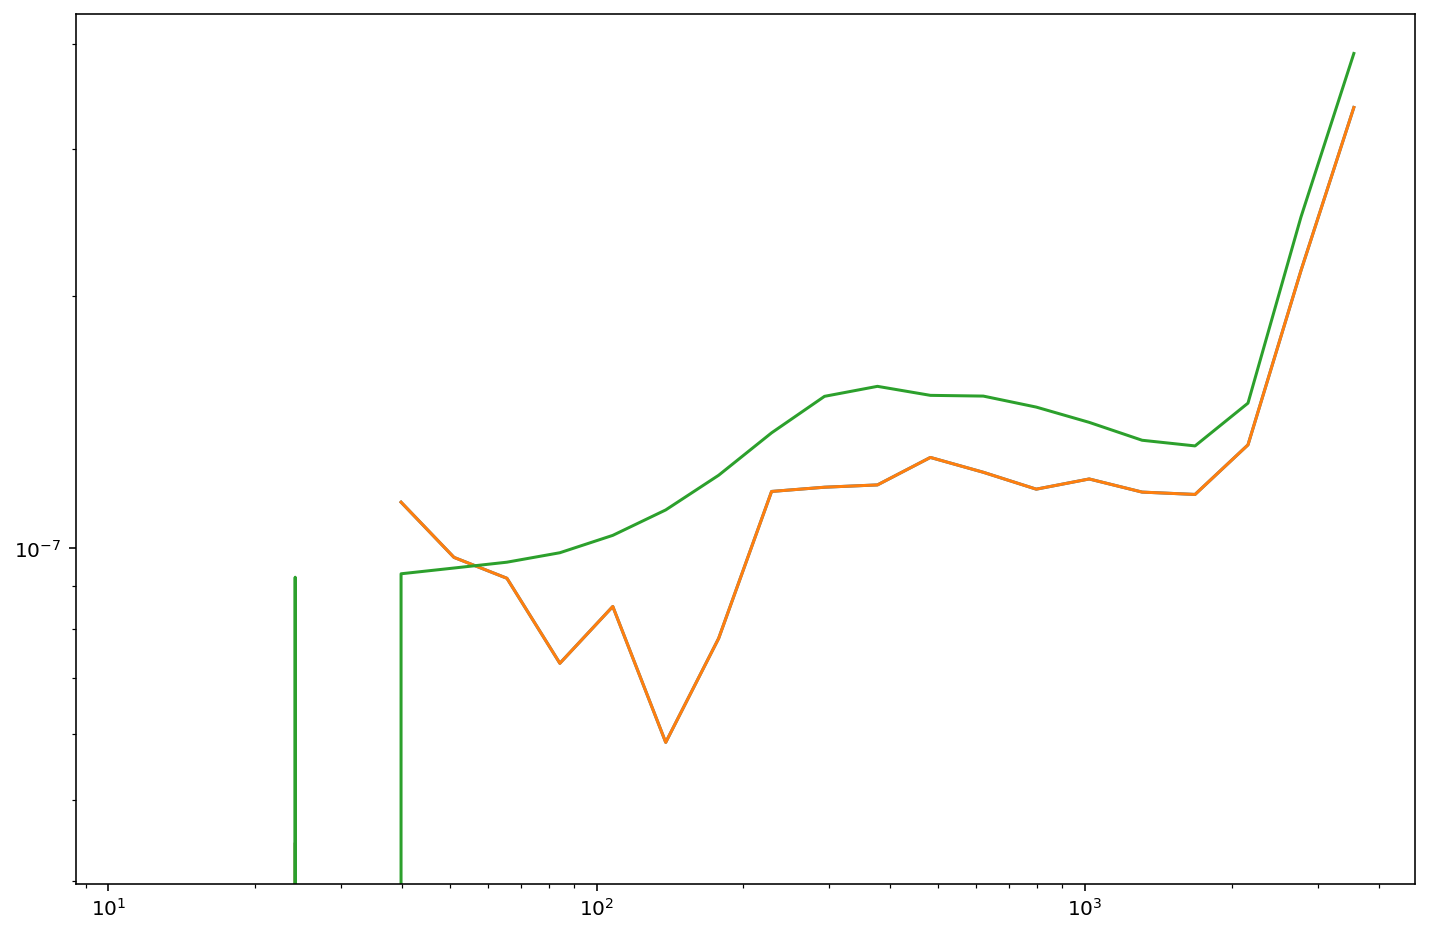

In [237]:
plt.plot(l, recAs)
plt.plot(l, cl)

plt.plot(l, N)

plt.xscale('log')
plt.yscale('log')

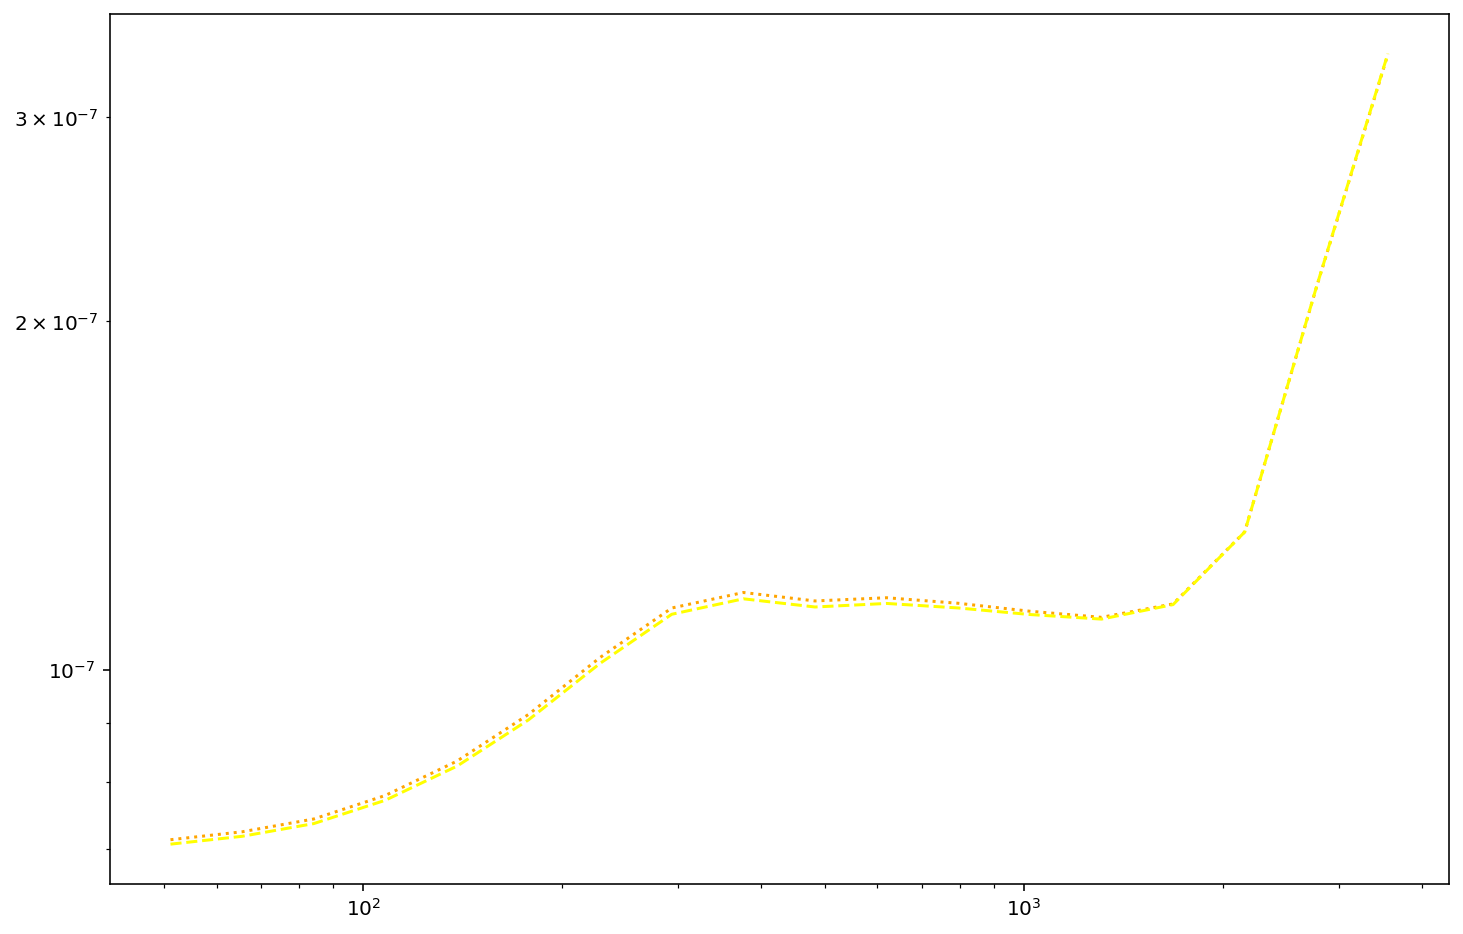

In [194]:
#plt.plot(lsel, noise_dict['bhhdv'][selection], ls = '--', color = 'red')
plt.plot(lsel, noise_dict['bhsymm'][selection], ls = ':', color = 'orange')
plt.plot(lsel, noise_dict['bhhdv2'][selection], ls = '--', color = 'yellow')

plt.xscale('log')
plt.yscale('log')

In [248]:
N.shape

(18, 2, 2)

In [252]:
np.swapaxes(N, 0, 2)[..., 0]

array([[7.58770541e-08, 7.22437077e-08],
       [7.22437077e-08, 5.67704844e-06]])

In [253]:
N[0]

array([[7.58770541e-08, 7.22437077e-08],
       [7.22437077e-08, 5.67704844e-06]])

In [297]:
k = 2

e = np.ones(k)

estims = ['hu_ok', 'symm']

selection = l>40

lsel = l[selection]
lenl = len(lsel)

N = np.zeros((lenl, k, k))

for i, e1 in enumerate(estims):
    for j, e2 in enumerate(estims):
        try:
            element = noise_dict[e1+e2]
        except:
            element = noise_dict[e2+e1]
            
        N[:, i, j] = element[selection]

In [309]:
ris = np.linalg.inv(N).dot(e)
ris /= np.einsum('...i, i -> ...', ris, e)[:, None]
ris

array([[ 1.00000000e+00, -1.09714653e-13],
       [ 1.00000000e+00, -2.92653410e-14],
       [ 1.00000000e+00, -2.42072975e-14],
       [ 1.00000000e+00, -2.58735649e-14],
       [ 1.00000000e+00, -1.55720023e-14],
       [ 1.00000000e+00, -9.62737409e-15],
       [ 1.00000000e+00, -3.21516501e-15],
       [ 1.00000000e+00, -3.53160295e-15],
       [ 1.00000000e+00, -2.43394135e-15],
       [ 1.00000000e+00, -1.60750525e-15],
       [ 1.00000000e+00, -1.63081692e-15],
       [ 1.00000000e+00, -2.45477183e-15],
       [ 1.00000000e+00, -2.45707329e-15],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -8.49597032e-16],
       [ 1.00000000e+00,  1.96185644e-15],
       [ 1.00000000e+00, -1.58540173e-15],
       [ 1.00000000e+00, -1.24823110e-15]])

In [310]:
ris.shape

(18, 2)

In [308]:
selection = np.where(ris<0)
notselection = np.where(ris>=0)

In [306]:
ris

(17,)

In [291]:
somma = abs(ris[selection])
ris[selection] = 0
ris[notselection] += somma
ris

ValueError: operands could not be broadcast together with shapes (36,) (0,) (36,) 

In [292]:
somma

array([], dtype=float64)

In [283]:
ris[selection]

array([], dtype=float64)

In [198]:
Ncomb = np.einsum('...i, ...ij, ...j -> ...', ris, N, ris)

In [199]:
N[:, 0, 0]/Ncomb

array([1.00003102, 1.00004724, 1.00007392, 1.00013132, 1.0002316 ,
       1.0004155 , 1.000763  , 1.00132827, 1.00194696, 1.00247948,
       1.00301635, 1.00270619, 1.00178563, 1.00068726, 1.00008717,
       1.00000018, 1.00011843, 1.0022552 ])

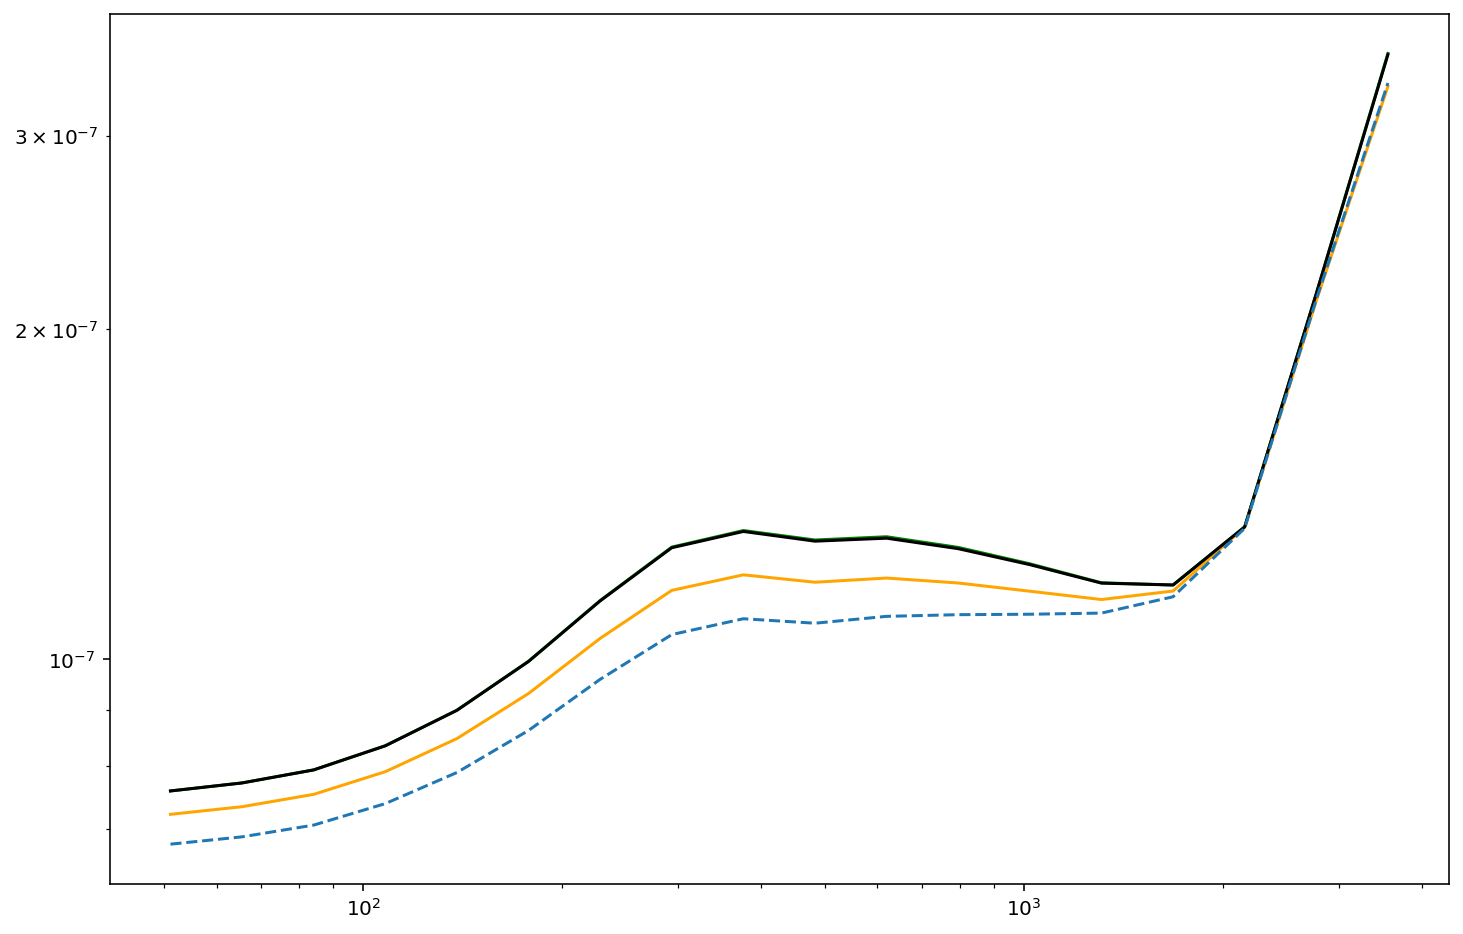

In [200]:
plt.plot(lsel, N[:, 0, 0], color = 'green')
plt.plot(lsel, N[:, 0, 1], color = 'orange')
#plt.plot(lsel, N[:, 1, 1], color = 'yellow')
plt.plot(lsel, Ncomb, color = 'black')

plt.plot(lsel, noise_dict['hu_okhu_ok'][selection], ls = '--')

plt.xscale('log')
plt.yscale('log')

In [39]:
feed_dict = u.Loadfeed_dict(pathlib.Path(spectra_path), ['ilc', 'ilcdepr'], ['ilcA', 'ilcB'], modlmap, hardening_A, hardening_B, tszprofile_A, tszprofile_B)
A = u.Estimator(shape, wcs, feed_dict, 'hu_ok', lmin_A, lmax_A,
                    field_names = ['ilcA', 'ilcB'], groups = None, Lmin = Lmin, Lmax = Lmax,
                    hardening = None, estimator_to_harden = None, XY = 'TT')

#feed_dict_ = u.Loadfeed_dict(pathlib.Path(spectra_path), ['ilc', 'ilcdepr'], ['ilcA', 'ilcB'], modlmap, hardening_A, hardening_B, tszprofile_A, tszprofile_B)
#feed_dict = {**feed_dict, **feed_dict_}
B = u.Estimator(shape, wcs, feed_dict, 'hdv', lmin_A, lmax_A,
                    field_names = ['ilc', 'ilcdepr'], groups = None, Lmin = Lmin, Lmax = Lmax,
                    hardening = None, estimator_to_harden = None, XY = 'TT')

C = u.Estimator(shape, wcs, feed_dict, 'hdv', lmin_A, lmax_A,
                    field_names = ['ilcdepr', 'ilc'], groups = None, Lmin = Lmin, Lmax = Lmax,
                    hardening = None, estimator_to_harden = None, XY = 'TT')

D = u.Estimator(shape, wcs, feed_dict, 'symm', lmin_A, lmax_A,
                    field_names = ['ilc', 'ilcdepr'], groups = None, Lmin = Lmin, Lmax = Lmax,
                    hardening = None, estimator_to_harden = None, XY = 'TT')

Binner = u.Binner(shape, wcs, lmin = 10, lmax = 4000, deltal = deltal, log = False, nBins = nlogBins)


N_depr_cross = B.get_Nl_cross_other(feed_dict, C, tipo = 't')
el, Nl_depr_cross = Binner.bin_spectra(N_depr_cross)

NAB = B.get_Nl_cross_other(feed_dict, B, tipo = 't')
el, Nl_AB = Binner.bin_spectra(NAB)

NBA = C.get_Nl_cross_other(feed_dict, C, tipo = 't')
el, Nl_BA = Binner.bin_spectra(NBA)

Nhuok = A.get_Nl_cross_other(feed_dict, A, tipo = 't')
el, Nl_huok = Binner.bin_spectra(Nhuok)

N_AB_huok = B.get_Nl_cross_other(feed_dict, A, tipo = 't')

N_BA_huok = C.get_Nl_cross_other(feed_dict, A, tipo = 't')

wAB, wBA = u.getasymmweights(NAB, NBA, N_depr_cross)

N_depr_huok_cross = wAB*N_AB_huok+wBA*N_BA_huok
el, Nl_depr_huok_cross = Binner.bin_spectra(N_depr_huok_cross)

N_symm_huok = D.get_Nl_cross_other(feed_dict, A, tipo = 't')
el, Nl_symm_huok = Binner.bin_spectra(N_symm_huok)

N_symm = D.get_Nl_cross_other(feed_dict, D, tipo = 't')
el, Nl_symm = Binner.bin_spectra(N_symm)

/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:532: RuntimeWarning: invalid value encountered in true_divide
  w_E1_E2 /= w
/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:533: RuntimeWarning: invalid value encountered in true_divide
  w_E2_E1 /= w
/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:545: RuntimeWarning: invalid value encountered in true_divide
  coadd_noise = (N_E1_E2*N_E2_E1-N_E1_E2_E2_E1**2.)/w
/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:532: RuntimeWarning: invalid value encountered in true_divide
  w_E1_E2 /= w
/gpfs/fs0/scratch/r/rbond/omard/CORI17112020/qelensingcomb/utilities.py:533: RuntimeWarning: invalid value encountered in true_divide
  w_E2_E1 /= w


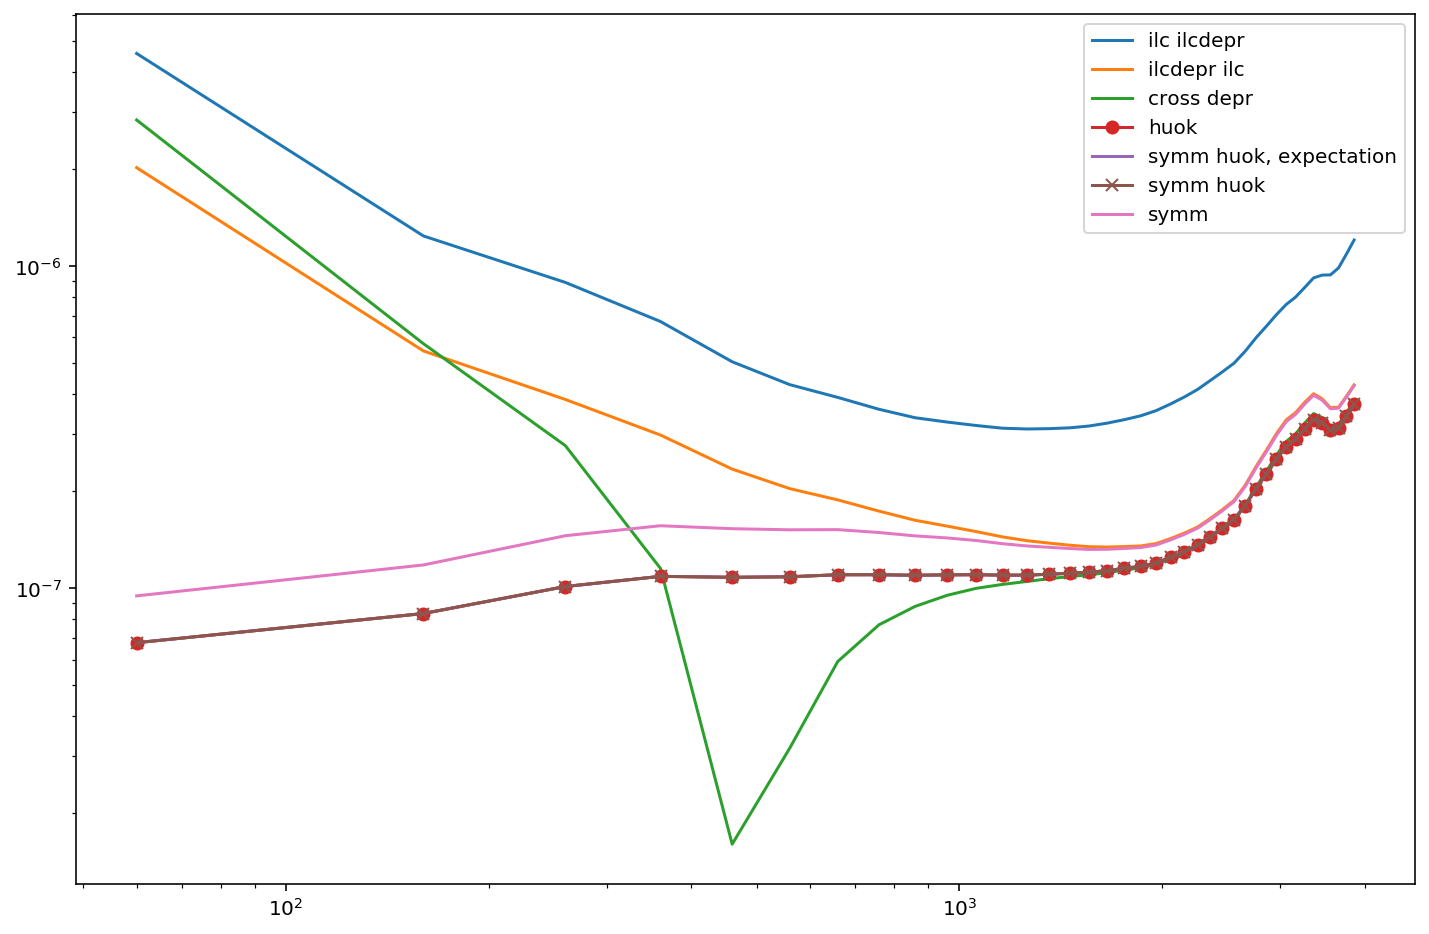

In [40]:
plt.plot(el, Nl_AB, label = 'ilc ilcdepr')
plt.plot(el, Nl_BA, label = 'ilcdepr ilc')
plt.plot(el, abs(Nl_depr_cross), label = 'cross depr')
plt.plot(el, Nl_huok, marker = 'o', label = 'huok')
plt.plot(el, Nl_depr_huok_cross, label = 'symm huok, expectation')

plt.plot(el, Nl_symm_huok, marker = 'x', label = 'symm huok')
plt.plot(el, Nl_symm, label = 'symm')

#plt.plot(el, )
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [42]:
P = PP/'h3500s3500b3500p3500sy3500'

getoutname = lambda key: f'{key}_{nu}.npy'

noises = np.load(P/getoutname(noisetag))
ells = np.load(P/getoutname('ells'))
kk = np.load(P/getoutname('kk'))
kg = np.load(P/getoutname('kg'))
gg = np.load(P/getoutname('gg'))

In [35]:
font = font_manager.FontProperties(family='cmss10',
                                   style='normal', size = 15)

In [36]:
estimators

['hu_ok', 'shear', 'bh', 'pbh', 'symm', 'symm-shear', 'symmbh', 'symmpbh']

In [37]:
selectedestimators = ['hu_ok'+'hu_ok', 'hu_ok'+'symm', 'symm'+'symm', 'bh'+'symm', 'bh'+'bh']

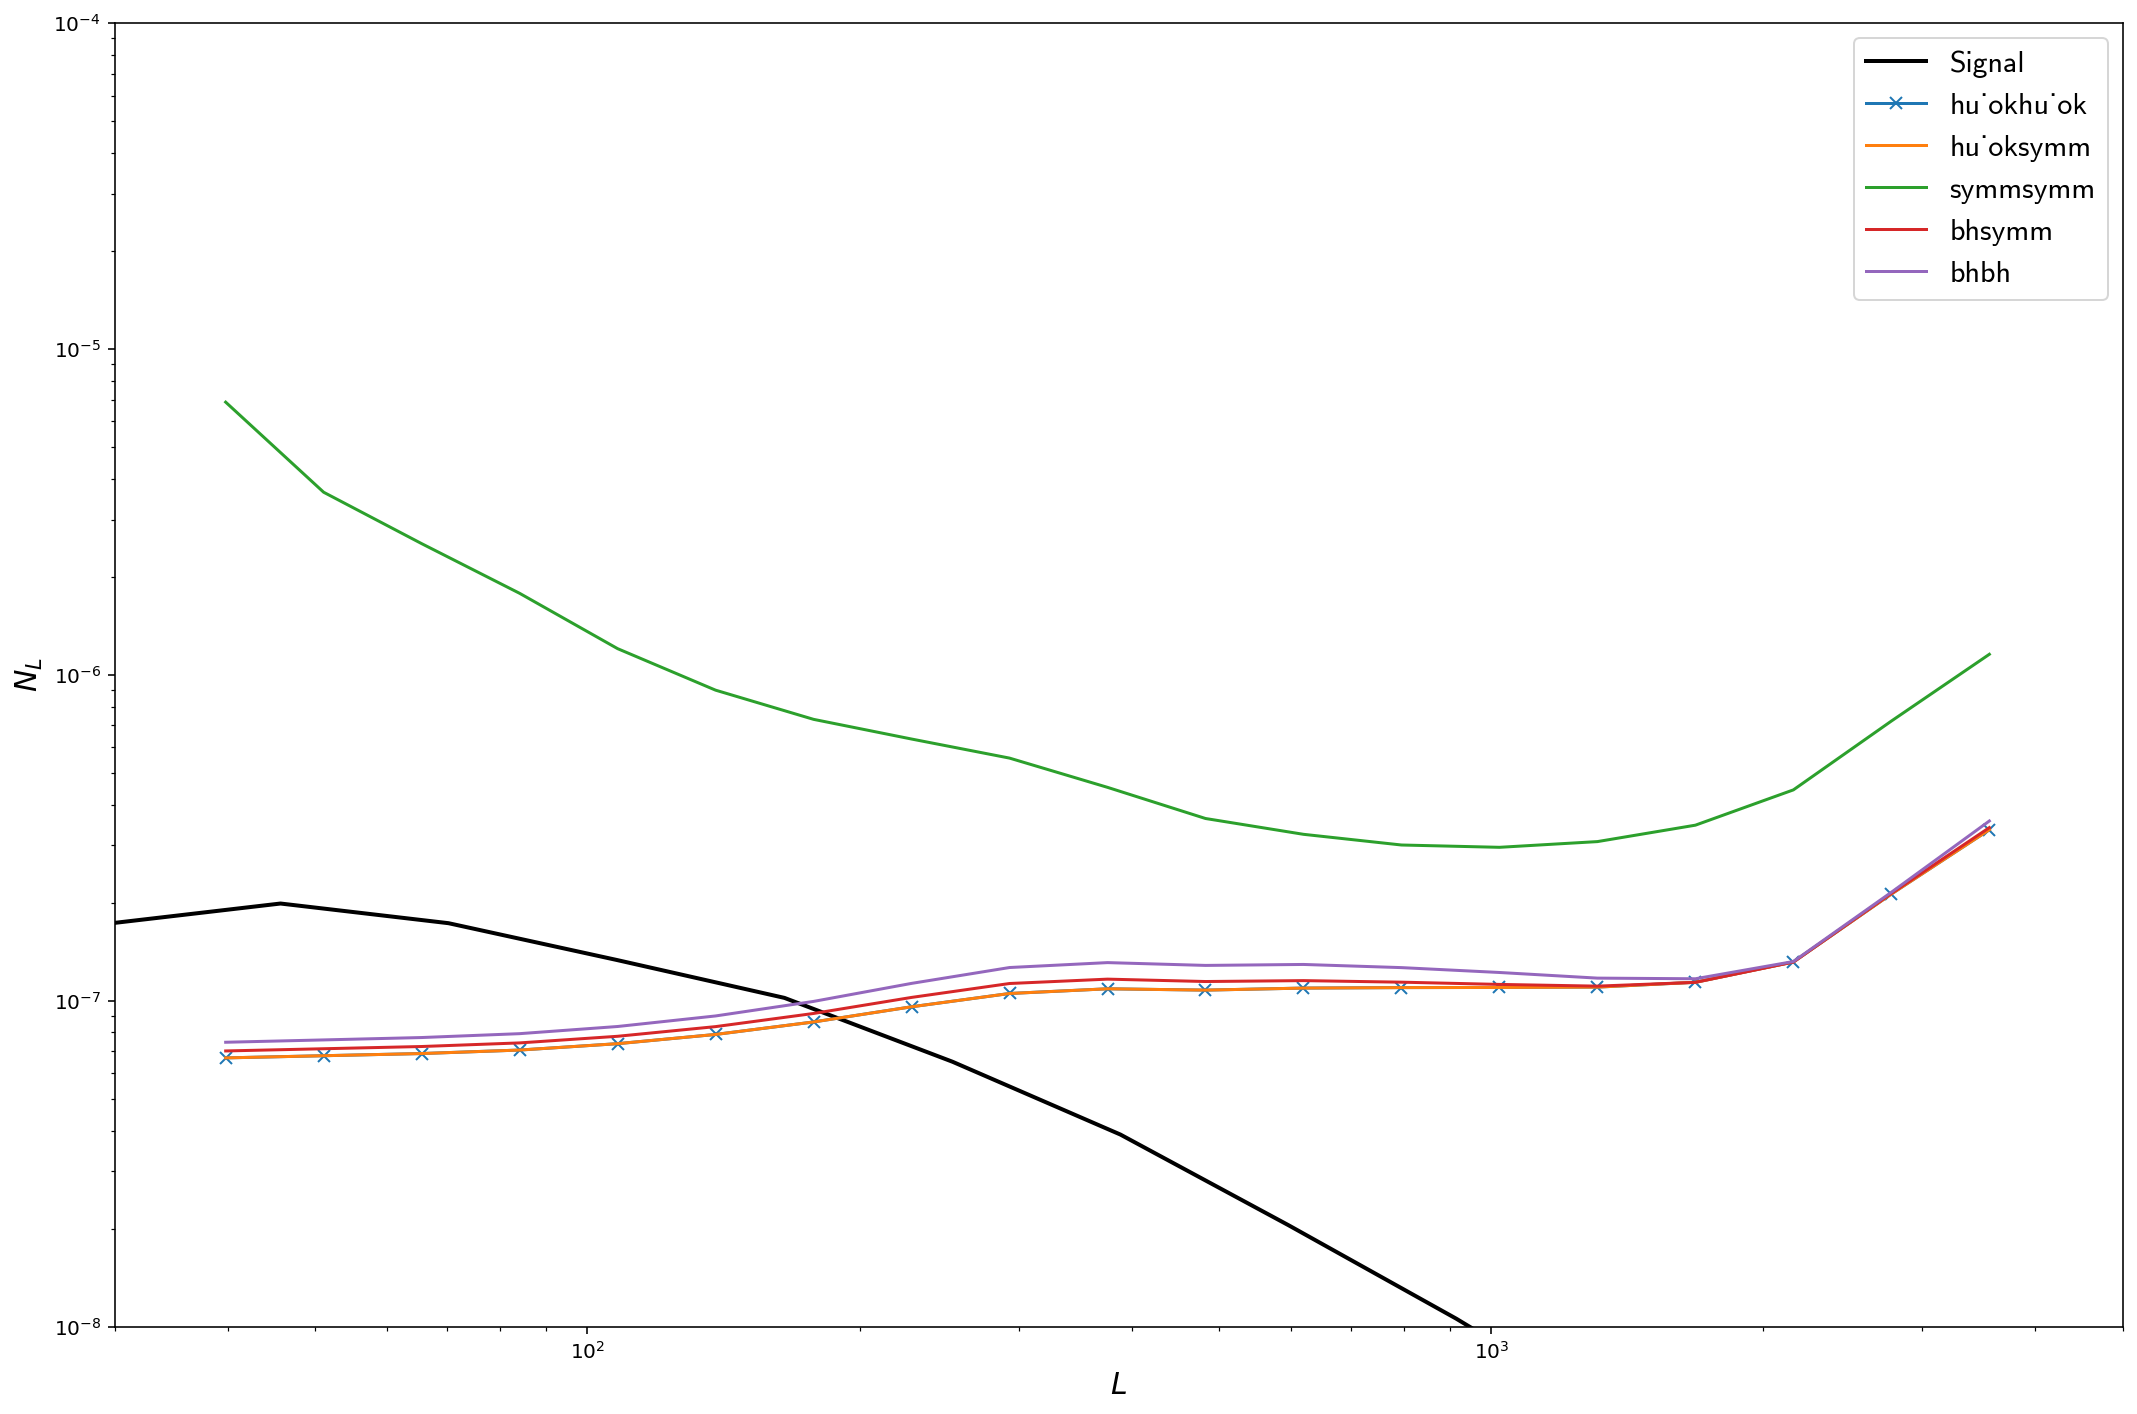

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (15, 10))
ax.plot(ells, kk, color = colors_ests['kk'], lw = 2, label = labels_ests['kk'])

#for e_index, e in enumerate(estimators):
#    ax.plot(el, noise_dict[e+e], color = colors_ests[e], label = labels_ests[e])
    
    
#for estA, estB in estimatorcombs:
#    ax.plot(el, noise_dict[estA+estB], color = colors_ests[estA], label = labels_ests[estA]+labels_ests[estB])
#    ax.plot(el, noise_dict[estA+estB], color = colors_ests[estB], ls = '--')

for e in selectedestimators:
    marker = 'x' if e == 'hu_ok'+'hu_ok' else None
    ax.plot(l, noise_dict[e],  label = e, marker = marker)
    
#plt.plot(l, Nl_symm_huok_, marker = 'o', label = 'symm huok')


    
#plt.plot(el, Nl_huok, marker = 'o', label = 'huok')
#plt.plot(el, Nl_depr_huok_cross, label = 'symm huok, expectation')

#plt.plot(el, Nl_symm_huok, marker = 'x', label = 'symm huok')
#plt.plot(el, Nl_symm, label = 'symm')
    
    
    
ax.set_ylabel('$N_L$', size = 15)
ax.set_xlabel('$L$', size = 15)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(30, 5000)
ax.set_ylim(1e-8, 1e-4)

ax.legend(prop = font)

fig.tight_layout()

fig.savefig(paperplots/'noises_ilc_3500.png', bbox_inches = 'tight', dpi = 300)
plt.show()

In [39]:
#ax[0].set_title(f'Best {names[i]}, h{h}_s{s}_b{b}', **csfont)
#fig.tight_layout()

In [40]:
lEdges = np.logspace(np.log10(10), np.log10(4000), 15, 10.)

In [41]:
deltal = lEdges[1:]-lEdges[:-1]